In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('trainh.csv')

In [2]:
print(str(len(df.index)))

878049


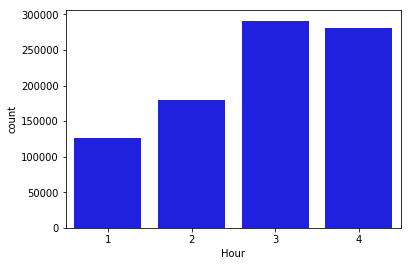

In [3]:
sns.countplot(x="Hour", data=df, color="blue")

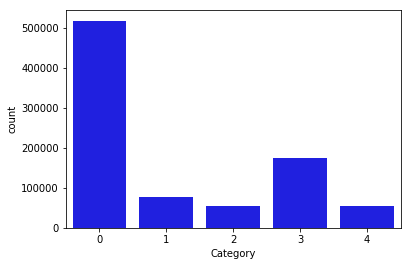

In [4]:
sns.countplot(x="Category", data=df, color="blue")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 10 columns):
Dates         878049 non-null object
Category      878049 non-null int64
DayOfWeek     878049 non-null int64
PdDistrict    878049 non-null int64
X             878049 non-null float64
Y             878049 non-null float64
Hour          878049 non-null int64
Day           878049 non-null int64
Month         878049 non-null int64
Year          878049 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 67.0+ MB


In [6]:
df.isnull().sum()

Dates         0
Category      0
DayOfWeek     0
PdDistrict    0
X             0
Y             0
Hour          0
Day           0
Month         0
Year          0
dtype: int64

In [7]:
df.head(5)

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
1,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
2,5/13/2015 23:33,0,4,5,-122.424363,37.800414,4,13,5,2015
3,5/13/2015 23:30,3,4,5,-122.426995,37.800873,4,13,5,2015
4,5/13/2015 23:30,3,4,6,-122.438738,37.771541,4,13,5,2015


In [8]:
df.drop(['Dates'], axis=1, inplace=True)

In [9]:
df.head(5)

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,0,4,5,-122.425892,37.774599,4,13,5,2015
1,0,4,5,-122.425892,37.774599,4,13,5,2015
2,0,4,5,-122.424363,37.800414,4,13,5,2015
3,3,4,5,-122.426995,37.800873,4,13,5,2015
4,3,4,6,-122.438738,37.771541,4,13,5,2015


In [10]:
x = df.drop("Category", axis=1)
y = df["Category"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()

In [15]:
logmodel.fit(x_train, y_train)

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
logmodel.score(x_train, y_train)

0.59096795816697412

In [26]:
logmodel.score(x_test, y_test)

0.58949566273750542

In [17]:
predictions = logmodel.predict(x_test)

In [18]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, predictions))

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.59      1.00      0.74    155290
           1       0.00      0.00      0.00     23212
           2       0.00      0.00      0.00     16215
           3       0.00      0.00      0.00     52625
           4       0.00      0.00      0.00     16073

   micro avg       0.59      0.59      0.59    263415
   macro avg       0.12      0.20      0.15    263415
weighted avg       0.35      0.59      0.44    263415



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))

[[155282      0      0      0      8]
 [ 23212      0      0      0      0]
 [ 16215      0      0      0      0]
 [ 52624      0      0      0      1]
 [ 16073      0      0      0      0]]


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, predictions)

0.58949566273750542

In [24]:
from sklearn.metrics import log_loss

In [25]:
logmodel_probs = logmodel.predict_proba(x_test)
score = log_loss(y_test, logmodel_probs)
print(score)

1.17178408626


## Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)

In [29]:
clf.score(x_train, y_train)

0.92837526072426846

In [30]:
clf.score(x_test, y_test)

0.51408234155230337

In [31]:
dec_prediction = clf.predict(x_test)

In [60]:
print(classification_report(y_test, dec_prediction))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65    155290
           1       0.18      0.18      0.18     23212
           2       0.32      0.30      0.30     16215
           3       0.37      0.32      0.34     52625
           4       0.36      0.39      0.38     16073

   micro avg       0.51      0.51      0.51    263415
   macro avg       0.37      0.37      0.37    263415
weighted avg       0.51      0.51      0.51    263415



In [33]:
print(confusion_matrix(y_test, dec_prediction))

[[103166  13354   8276  23365   7129]
 [ 14812   4075    700   2798    827]
 [  9913    588   4789    737    188]
 [ 27964   3359   1165  17075   3062]
 [  6223    821    259   2458   6312]]


In [34]:
clf_probs = clf.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
print(score)

15.6427139827


## K Nearest Neighbour

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [40]:
knn.score(x_train, y_train)

0.59774760263831805

In [41]:
knn.score(x_test, y_test)

0.58444659567602453

In [50]:
knn_prediction = knn.predict(x_test)

In [61]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.59      0.97      0.74    155290
           1       0.17      0.00      0.00     23212
           2       0.36      0.03      0.05     16215
           3       0.37      0.06      0.11     52625
           4       0.30      0.01      0.02     16073

   micro avg       0.58      0.58      0.58    263415
   macro avg       0.36      0.21      0.18    263415
weighted avg       0.48      0.58      0.46    263415



In [52]:
print(confusion_matrix(y_test, knn_prediction))

[[149925     37    611   4498    219]
 [ 22485     11     88    601     27]
 [ 15455      1    470    280      9]
 [ 49004     15    124   3408     74]
 [ 15407      1      5    522    138]]


In [53]:
knn_probs = knn.predict_proba(x_test)
score = log_loss(y_test, knn_probs)
print(score)

2.05862724194


## Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
gnb.score(x_train, y_train)

0.27752613750622324

In [49]:
gnb.score(x_test, y_test)

0.2766547083499421

In [54]:
gnb_prediction = gnb.predict(x_test)

In [58]:
print(classification_report(y_test, gnb_prediction))

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.62      0.39      0.47    155290
           1       0.00      0.00      0.00     23212
           2       0.08      0.80      0.14     16215
           3       0.00      0.00      0.00     52625
           4       0.12      0.00      0.00     16073

   micro avg       0.28      0.28      0.28    263415
   macro avg       0.16      0.24      0.12    263415
weighted avg       0.38      0.28      0.29    263415



In [56]:
print(confusion_matrix(y_test, gnb_prediction))

[[59835     0 95438     0    17]
 [ 9235     0 13975     0     2]
 [ 3178     0 13037     0     0]
 [16748     0 35874     0     3]
 [ 7709     0  8361     0     3]]


In [57]:
gnb_probs = gnb.predict_proba(x_test)
score = log_loss(y_test, gnb_probs)
print(score)

1.64989724697
